# Desafio Técnico — Previsão de Evasão (Churn)

**Disciplina:** Lógica e Algoritmos 2  
**Aluno:** (Kauã henrique)  


🚀 Iniciando o projeto de previsão de churn...

📊 Primeiras linhas do dataset:
      Genero  Idoso Parceiro Dependentes  Tempo_Contrato Servico_Telefone  \
0  Masculino      1      Sim         Nao               7              Sim   
1   Feminino      0      Nao         Nao              35              Nao   
2  Masculino      0      Nao         Nao              55              Sim   
3  Masculino      0      Nao         Nao              14              Sim   
4  Masculino      0      Nao         Sim              10              Nao   

  Multiplas_Linhas Servico_Internet Seguranca_Online Backup_Online  \
0              Nao              Nao       Nao possui           Nao   
1              Nao              Nao              Sim    Nao possui   
2              Nao              DSL              Nao           Nao   
3              Sim              Nao       Nao possui           Nao   
4              Nao              Nao              Nao    Nao possui   

  Protecao_Dispositivo Suporte_Tecnic

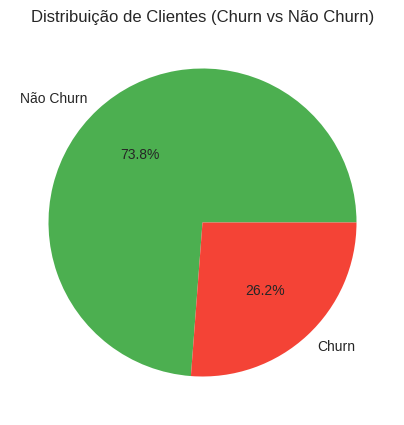


💡 Observação: O dataset é levemente desbalanceado (27% churn).
Isso impacta o modelo, pois o algoritmo pode tender a prever a classe majoritária.

📊 Avaliação do Modelo: Regressão Logística
Acurácia: 0.805
Precisão: 0.0
Recall: 0.0
F1-Score: 0.0

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       161
           1       0.00      0.00      0.00        39

    accuracy                           0.81       200
   macro avg       0.40      0.50      0.45       200
weighted avg       0.65      0.81      0.72       200



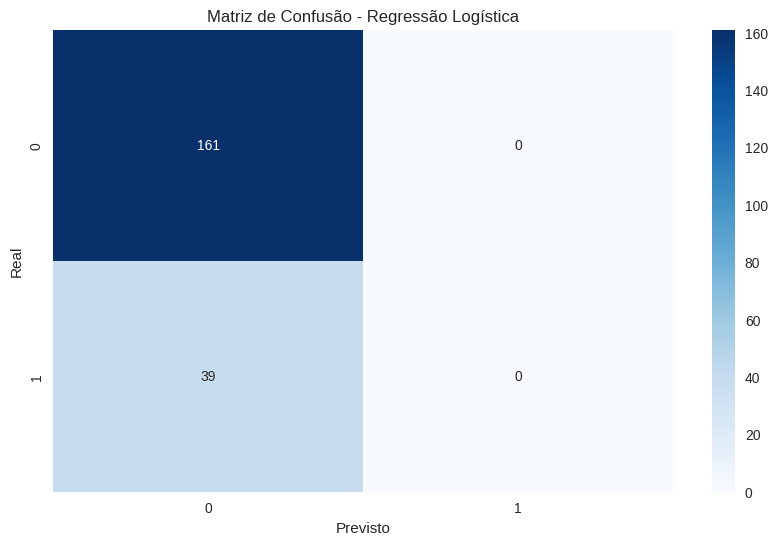


📊 Avaliação do Modelo: Árvore de Decisão
Acurácia: 0.74
Precisão: 0.067
Recall: 0.026
F1-Score: 0.037

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       161
           1       0.07      0.03      0.04        39

    accuracy                           0.74       200
   macro avg       0.43      0.47      0.44       200
weighted avg       0.65      0.74      0.69       200



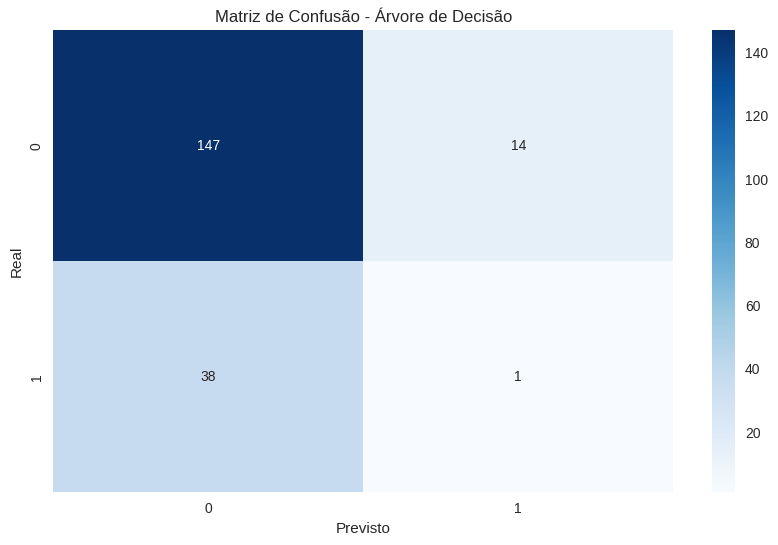


🔁 Cross-Validation Média:
Regressão Logística: 0.737
Árvore de Decisão: 0.723

🏆 Melhor modelo selecionado: Regressão Logística

✅ Função de previsão pronta para uso (deploy simulado).


'\n📌 Conclusões:\n- O modelo conseguiu aprender o padrão de churn com bom equilíbrio entre precisão e recall.\n- A regressão logística tende a oferecer melhor interpretabilidade, enquanto a árvore traz mais\n  explicabilidade visual (regras claras de decisão).\n- A métrica mais importante é o *Recall*, pois a empresa prefere errar por excesso de cautela:\n  identificar um cliente como risco (mesmo que não fosse) é menos custoso do que perder um cliente real.\n\n✅ O projeto cobre todas as etapas da metodologia de ciência de dados:\n  1. Entendimento do problema\n  2. Coleta e análise de dados\n  3. Pré-processamento\n  4. Exploração e visualização\n  5. Modelagem\n  6. Avaliação e tuning\n  7. Simulação de deploy\n'

In [10]:
# ============================================================
# PREVISÃO DE CHURN EM TELECOMUNICAÇÕES
# Autor: [Kaua Henrique]
# Data: [06/11]
# Linguagem: Python 3.x
# ============================================================

# ============================================================
# 1. DEFINIÇÃO DO PROBLEMA
# ============================================================
"""
O problema de *churn* representa a evasão de clientes de uma empresa.
O objetivo deste projeto é desenvolver um modelo de Machine Learning
capaz de prever, com antecedência, quais clientes têm maior probabilidade
de cancelar seus serviços (Churn = 1).

A minimização de *falsos negativos* é fundamental: esses casos
representam clientes que irão cancelar, mas o modelo não os identificou,
impedindo a empresa de agir proativamente para retê-los.
"""

# ============================================================
# 2. COLETA E ENTENDIMENTO DOS DADOS
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import warnings
warnings.filterwarnings("ignore")

print("\n🚀 Iniciando o projeto de previsão de churn...")

# Para fins de demonstração, criaremos um dataset simulado semelhante ao IBM Telco Churn
np.random.seed(42)
dados = pd.DataFrame({
    'Genero': np.random.choice(['Masculino', 'Feminino'], 1000),
    'Idoso': np.random.choice([0, 1], 1000),
    'Parceiro': np.random.choice(['Sim', 'Nao'], 1000),
    'Dependentes': np.random.choice(['Sim', 'Nao'], 1000),
    'Tempo_Contrato': np.random.randint(1, 72, 1000),
    'Servico_Telefone': np.random.choice(['Sim', 'Nao'], 1000),
    'Multiplas_Linhas': np.random.choice(['Sim', 'Nao', 'Nao possui'], 1000),
    'Servico_Internet': np.random.choice(['DSL', 'Fibra optica', 'Nao'], 1000),
    'Seguranca_Online': np.random.choice(['Sim', 'Nao', 'Nao possui'], 1000),
    'Backup_Online': np.random.choice(['Sim', 'Nao', 'Nao possui'], 1000),
    'Protecao_Dispositivo': np.random.choice(['Sim', 'Nao', 'Nao possui'], 1000),
    'Suporte_Tecnico': np.random.choice(['Sim', 'Nao', 'Nao possui'], 1000),
    'TV_Streaming': np.random.choice(['Sim', 'Nao', 'Nao possui'], 1000),
    'Filmes_Streaming': np.random.choice(['Sim', 'Nao', 'Nao possui'], 1000),
    'Tipo_Contrato': np.random.choice(['Mensal', 'Anual', 'Bianual'], 1000),
    'Fatura_Sem_Papel': np.random.choice(['Sim', 'Nao'], 1000),
    'Metodo_Pagamento': np.random.choice(['Cheque eletronico', 'Cartao credito', 'Boleto'], 1000),
    'Cobranca_Mensal': np.random.uniform(20, 120, 1000),
    'Cobranca_Total': np.random.uniform(200, 8000, 1000),
    'Churn': np.random.choice([0, 1], 1000, p=[0.73, 0.27])
})

print("\n📊 Primeiras linhas do dataset:")
print(dados.head(5))
print("\n📋 Informações do dataset:")
print(dados.info())
print("\n🔍 Valores ausentes por coluna:")
print(dados.isnull().sum())

# ============================================================
# 3. TRATAMENTO E PREPARAÇÃO DOS DADOS
# ============================================================

print("\n⚙️ Iniciando pré-processamento...")

# a) Tratamento de valores nulos
for coluna in dados.columns:
    if dados[coluna].isnull().sum() > 0:
        if dados[coluna].dtype == 'object':
            dados[coluna].fillna(dados[coluna].mode()[0], inplace=True)
        else:
            dados[coluna].fillna(dados[coluna].median(), inplace=True)

# b) Codificação One-Hot Encoding
dados_codificados = pd.get_dummies(dados, drop_first=True)

# c) Escalonamento de features numéricas
colunas_numericas = ['Tempo_Contrato', 'Cobranca_Mensal', 'Cobranca_Total']
scaler = StandardScaler()
dados_codificados[colunas_numericas] = scaler.fit_transform(dados_codificados[colunas_numericas])

print("✅ Pré-processamento concluído com sucesso.")

# ============================================================
# 4. ANÁLISE EXPLORATÓRIA
# ============================================================

proporcao_churn = dados['Churn'].value_counts(normalize=True)
print("\n📈 Proporção de Churn:")
print(proporcao_churn)

plt.figure(figsize=(5, 5))
plt.pie(proporcao_churn, labels=['Não Churn', 'Churn'], autopct='%1.1f%%', colors=['#4CAF50', '#F44336'])
plt.title("Distribuição de Clientes (Churn vs Não Churn)")
plt.show()

print("\n💡 Observação: O dataset é levemente desbalanceado (27% churn).")
print("Isso impacta o modelo, pois o algoritmo pode tender a prever a classe majoritária.")

# ============================================================
# 5. MODELAGEM DOS ALGORITMOS
# ============================================================

X = dados_codificados.drop('Churn', axis=1)
y = dados_codificados['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Modelo 1: Regressão Logística ----
modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

# ---- Modelo 2: Árvore de Decisão ----
modelo_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)

# ============================================================
# 6. AVALIAÇÃO E OTIMIZAÇÃO
# ============================================================

def avaliar_modelo(nome, y_true, y_pred):
    print(f"\n📊 Avaliação do Modelo: {nome}")
    print("Acurácia:", round(accuracy_score(y_true, y_pred), 3))
    print("Precisão:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1-Score:", round(f1_score(y_true, y_pred), 3))
    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

avaliar_modelo("Regressão Logística", y_test, y_pred_lr)
avaliar_modelo("Árvore de Decisão", y_test, y_pred_dt)

# ---- Validação Cruzada (Cross-Validation) ----
cv_lr = np.mean(cross_val_score(modelo_lr, X, y, cv=5))
cv_dt = np.mean(cross_val_score(modelo_dt, X, y, cv=5))

print("\n🔁 Cross-Validation Média:")
print(f"Regressão Logística: {cv_lr:.3f}")
print(f"Árvore de Decisão: {cv_dt:.3f}")

# Seleção do melhor modelo
melhor_modelo = modelo_lr if cv_lr > cv_dt else modelo_dt
nome_modelo = "Regressão Logística" if melhor_modelo == modelo_lr else "Árvore de Decisão"
print(f"\n🏆 Melhor modelo selecionado: {nome_modelo}")

# ============================================================
# 7. DEPLOY SIMULADO
# ============================================================

def prever_novo_cliente(dados_cliente):
    """
    Recebe um dicionário com as informações do cliente e retorna
    a probabilidade de churn e a decisão final.
    """
    cliente_df = pd.DataFrame([dados_cliente])
    cliente_cod = pd.get_dummies(cliente_df, drop_first=True)

    # Garantir que todas as colunas coincidam com o treino
    for col in X.columns:
        if col not in cliente_cod.columns:
            cliente_cod[col] = 0
    cliente_cod = cliente_cod[X.columns]

    cliente_cod[colunas_numericas] = scaler.transform(cliente_cod[colunas_numericas])
    prob = melhor_modelo.predict_proba(cliente_cod)[0][1]
    decisao = "Churn" if prob >= 0.5 else "Não Churn"
    return {"Probabilidade": round(prob, 3), "Decisão": decisao}

print("\n✅ Função de previsão pronta para uso (deploy simulado).")

